In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime

In [2]:
#%pip install Faker

In [3]:
hist_comp_madrid_int = pd.read_csv('../../evolucion_precioporm2_madrid_centro.csv')

hist_comp_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,4.268 €/m2,"+ 1,9 %","+ 5,0 %","+ 9,5 %",NaN
1,Enero 2024,4.190 €/m2,"+ 1,7 %","+ 3,1 %","+ 8,2 %",NaN
2,Diciembre 2023,4.118 €/m2,"+ 1,3 %","+ 2,0 %","+ 6,1 %",NaN
3,Noviembre 2023,4.064 €/m2,"+ 1,2 %","+ 3,8 %","0,0 %",NaN
4,Octubre 2023,4.064 €/m2,"+ 0,7 %","+ 1,6 %","+ 3,8 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,3.551 €/m2,"+ 2,1 %",n.d.,n.d.,NaN
214,Abril 2006,3.478 €/m2,NaN,n.d.,n.d.,"- 3,7 %"
215,Marzo 2006,3.609 €/m2,n.d.,n.d.,n.d.,NaN
216,Febrero 2006,n.d.,n.d.,n.d.,n.d.,NaN


In [4]:
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [5]:
hist_comp_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [6]:
hist_comp_madrid_int = hist_comp_madrid_int.iloc[:-2, :]

In [7]:
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('€/m2', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('.', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].astype(int)

In [8]:
hist_comp_madrid_int[['mes', 'año']] = hist_comp_madrid_int['fecha'].str.split(expand=True)
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns='fecha')

In [9]:
hist_comp_madrid_int = hist_comp_madrid_int[['año', 'mes', '€/m2']]

In [10]:
meses_a_numero = {
    "enero": 1,
    "febrero": 2,
    "marzo": 3,
    "abril": 4,
    "mayo": 5,
    "junio": 6,
    "julio": 7,
    "agosto": 8,
    "septiembre": 9,
    "octubre": 10,
    "noviembre": 11,
    "diciembre": 12
}

In [11]:
hist_comp_madrid_int['mes'] = hist_comp_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [12]:
hist_comp_madrid_int['fecha'] = pd.to_datetime(hist_comp_madrid_int['año'].astype(str) + '-' + hist_comp_madrid_int['mes'].astype(str), format='%Y-%m')

hist_comp_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [13]:
hist_comp_madrid_int = hist_comp_madrid_int[['fecha', '€/m2']]

In [14]:
hist_comp_madrid = pd.read_csv('../../evolucion_precioporm2_madrid.csv')

In [15]:
hist_comp_madrid

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5
0,Febrero 2024,3.292 €/m2,"+ 1,4 %","+ 3,8 %","+ 6,8 %"
1,Enero 2024,3.247 €/m2,"+ 1,2 %","+ 3,0 %","+ 6,1 %"
2,Diciembre 2023,3.208 €/m2,"+ 1,2 %","+ 2,5 %","+ 4,8 %"
3,Noviembre 2023,3.170 €/m2,"+ 0,6 %","+ 1,0 %","+ 3,1 %"
4,Octubre 2023,3.152 €/m2,"+ 0,7 %","+ 0,3 %","+ 3,1 %"
...,...,...,...,...,...
213,Mayo 2006,2.596 €/m2,"+ 1,9 %",NaN,"- 6,1 %"
214,Abril 2006,2.547 €/m2,NaN,"- 5,0 %","- 2,6 %"
215,Marzo 2006,2.614 €/m2,NaN,n.d.,"- 5,4 %"
216,Febrero 2006,2.765 €/m2,"+ 3,1 %",n.d.,NaN


In [16]:
hist_comp_madrid = hist_comp_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [17]:
hist_comp_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [18]:
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('€/m2', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('.', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].astype(int)

In [19]:
hist_comp_madrid[['mes', 'año']] = hist_comp_madrid['fecha'].str.split(expand=True)
hist_comp_madrid = hist_comp_madrid.drop(columns='fecha')

In [20]:
hist_comp_madrid = hist_comp_madrid[['año', 'mes', '€/m2']]

In [21]:
hist_comp_madrid['mes'] = hist_comp_madrid['mes'].str.lower().replace(meses_a_numero)

In [22]:
hist_comp_madrid['fecha'] = pd.to_datetime(hist_comp_madrid['año'].astype(str) + '-' + hist_comp_madrid['mes'].astype(str), format='%Y-%m')

hist_comp_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [23]:
hist_comp_madrid = hist_comp_madrid[['fecha', '€/m2']]

In [24]:
hist_alq_madrid_int = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_centro.csv')

In [25]:
hist_alq_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,"18,7 €/m2","+ 2,3 %","+ 5,2 %","+ 15,5 %",NaN
1,Enero 2024,"18,3 €/m2","+ 1,8 %","+ 2,7 %","+ 14,1 %",NaN
2,Diciembre 2023,"17,9 €/m2","+ 1,0 %","+ 1,6 %","+ 13,6 %",NaN
3,Noviembre 2023,"17,7 €/m2","+ 1,9 %","+ 12,4 %","- 0,2 %",NaN
4,Octubre 2023,"17,8 €/m2","+ 0,8 %","+ 4,2 %","+ 11,6 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,n.d.,n.d.,n.d.,NaN,n.d.
214,Abril 2006,n.d.,n.d.,n.d.,NaN,n.d.
215,Marzo 2006,n.d.,n.d.,n.d.,NaN,n.d.
216,Febrero 2006,n.d.,n.d.,n.d.,NaN,n.d.


In [26]:
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [27]:
hist_alq_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [28]:
hist_alq_madrid_int = hist_alq_madrid_int.iloc[:-19, :]

In [29]:
hist_alq_madrid_int.tail()

,fecha,€/m2
194,Diciembre 2007,"12,7 €/m2"
195,Noviembre 2007,"13,4 €/m2"
196,Octubre 2007,"13,1 €/m2"
197,Septiembre 2007,"14,5 €/m2"
198,Agosto 2007,"14,1 €/m2"


In [30]:
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace('€/m2', '')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace(',','.')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].astype(float)

In [31]:
hist_alq_madrid_int[['mes', 'año']] = hist_alq_madrid_int['fecha'].str.split(expand=True)
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns='fecha')

In [32]:
hist_alq_madrid_int = hist_alq_madrid_int[['año', 'mes', '€/m2']]

In [33]:
hist_alq_madrid_int['mes'] = hist_alq_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [34]:
hist_alq_madrid_int['fecha'] = pd.to_datetime(hist_alq_madrid_int['año'].astype(str) + '-' + hist_alq_madrid_int['mes'].astype(str), format='%Y-%m')

hist_alq_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [35]:
hist_alq_madrid_int = hist_alq_madrid_int[['fecha', '€/m2']]

In [36]:
hist_alq_madrid = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_comunidad.csv')

In [37]:
hist_alq_madrid = hist_alq_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [38]:
hist_alq_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [39]:
hist_alq_madrid = hist_alq_madrid.iloc[:-15, :]

In [40]:
hist_alq_madrid.tail()

,fecha,€/m2
198,Agosto 2007,"11,4 €/m2"
199,Julio 2007,"11,5 €/m2"
200,Junio 2007,"11,4 €/m2"
201,Mayo 2007,"11,9 €/m2"
202,Abril 2007,"11,6 €/m2"


In [41]:
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace('€/m2', '')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace(',','.')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].astype(float)

In [42]:
hist_alq_madrid[['mes', 'año']] = hist_alq_madrid['fecha'].str.split(expand=True)
hist_alq_madrid = hist_alq_madrid.drop(columns='fecha')

In [43]:
hist_alq_madrid = hist_alq_madrid[['año', 'mes', '€/m2']]

In [44]:
hist_alq_madrid['mes'] = hist_alq_madrid['mes'].str.lower().replace(meses_a_numero)

In [45]:
hist_alq_madrid['fecha'] = pd.to_datetime(hist_alq_madrid['año'].astype(str) + '-' + hist_alq_madrid['mes'].astype(str), format='%Y-%m')

hist_alq_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [46]:
hist_alq_madrid = hist_alq_madrid[['fecha', '€/m2']]

In [66]:
hist_comp_madrid_int.to_csv('hist_comp_madrid_centro.csv', index=True)

In [67]:
hist_comp_madrid.to_csv('hist_comp_madrid.csv', index=True)

In [68]:
hist_alq_madrid_int.to_csv('hist_alq_madrid_centro.csv', index=True)

In [69]:
hist_alq_madrid.to_csv('hist_alq_madrid.csv', index=True)

In [47]:
alquiler = pd.read_csv('../alquiler/madrid_alquiler_03.2024.csv')

alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje
0,4,arganzuela,600.0,25,0,3,3,3,0
1,0,arganzuela,700.0,35,2,0,1,0,0
2,0,arganzuela,790.0,40,1,1,0,1,0
3,4,arganzuela,800.0,40,0,3,3,3,0
4,0,arganzuela,800.0,35,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...
8177,0,villaverde,1465.0,45,1,6,1,1,0
8178,3,villaverde,1475.0,64,2,5,1,1,0
8179,0,villaverde,1500.0,90,4,6,1,1,0
8180,0,villaverde,1895.0,80,2,0,1,1,0


In [48]:
mad_int = pd.read_csv('../venta_madrid centro/madrid_centro_compra_03.2024.csv')

mad_int

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor
0,0,villaverde,26100,59,2,3,3,0
1,0,villaverde,50600,53,3,2,3,3
2,0,villaverde,51700,60,3,3,1,0
3,0,villaverde,51700,60,3,3,3,0
4,0,villaverde,51700,59,3,4,1,0
...,...,...,...,...,...,...,...,...
17827,1,arganzuela,1250000,302,5,-4,2,2
17828,1,arganzuela,1250000,380,2,-4,2,2
17829,0,arganzuela,1300000,360,4,-3,1,1
17830,0,arganzuela,1333000,214,4,6,1,1


In [49]:
mad_ext = pd.read_csv('../venta_madrid_ext/madrid_ext_compra_03.2024.csv')

mad_ext

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor
0,1,corredorhenares,24000,45,1,-4,2,2
1,1,corredorhenares,29900,72,2,-4,2,2
2,1,corredorhenares,47700,92,3,-4,2,2
3,1,corredorhenares,47700,92,3,-4,2,2
4,1,corredorhenares,49000,134,3,-4,2,2
...,...,...,...,...,...,...,...,...
17998,1,sureste,1400000,805,12,-4,2,2
17999,1,sureste,1400000,950,10,-4,2,2
18000,1,sureste,1500000,500,5,-4,2,2
18001,1,sureste,2000000,3000,1,-4,2,2


In [50]:
alquiler['€/m2'] = alquiler['precio'] / alquiler['superficie']

In [51]:
mad_ext['€/m2'] = mad_ext['precio'] / mad_ext['superficie']

In [52]:
mad_int['€/m2'] = mad_int['precio'] / mad_int['superficie']

In [53]:
precios = {}

for i in alquiler['zona'].unique():
    
    df = alquiler[alquiler['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

alquiler['zona_€/m2'] = alquiler['zona'].map(precios)

In [54]:
alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2
0,4,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674
1,0,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674
2,0,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674
3,4,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674
4,0,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674
...,...,...,...,...,...,...,...,...,...,...,...
8177,0,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223
8178,3,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223
8179,0,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223
8180,0,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223


In [55]:
precios = {}

for i in mad_ext['zona'].unique():
    
    df = mad_ext[mad_ext['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_ext['zona_€/m2'] = mad_ext['zona'].map(precios)

In [56]:
mad_ext

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,1,corredorhenares,24000,45,1,-4,2,2,533.333333,1351.553591
1,1,corredorhenares,29900,72,2,-4,2,2,415.277778,1351.553591
2,1,corredorhenares,47700,92,3,-4,2,2,518.478261,1351.553591
3,1,corredorhenares,47700,92,3,-4,2,2,518.478261,1351.553591
4,1,corredorhenares,49000,134,3,-4,2,2,365.671642,1351.553591
...,...,...,...,...,...,...,...,...,...,...
17998,1,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17999,1,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
18000,1,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
18001,1,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [57]:
precios = {}

for i in mad_int['zona'].unique():
    
    df = mad_int[mad_int['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_int['zona_€/m2'] = mad_int['zona'].map(precios)

In [58]:
mad_int

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,0,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...
17827,1,arganzuela,1250000,302,5,-4,2,2,4139.072848,4700.675812
17828,1,arganzuela,1250000,380,2,-4,2,2,3289.473684,4700.675812
17829,0,arganzuela,1300000,360,4,-3,1,1,3611.111111,4700.675812
17830,0,arganzuela,1333000,214,4,6,1,1,6228.971963,4700.675812


In [59]:
alquiler.head()

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2
0,4,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674
1,0,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674
2,0,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674
3,4,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674
4,0,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674


In [70]:
madrid_total = pd.concat([mad_int,mad_ext])

In [71]:
madrid_total

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,0,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...
17998,1,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17999,1,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
18000,1,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
18001,1,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [87]:
madrid_total

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,0,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...
17998,1,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17999,1,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
18000,1,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
18001,1,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [90]:
df1 = alquiler[alquiler['zona']=='arganzuela']

In [91]:
df1.precio.describe()

count     298.000000
mean     1530.949664
std       518.604071
min       600.000000
25%      1200.000000
50%      1466.000000
75%      1800.000000
max      5400.000000
Name: precio, dtype: float64

In [92]:
df2 = alquiler[alquiler['zona']=='bsalamanca']

In [93]:
df2.precio.describe()

count      957.000000
mean      3380.434692
std       2468.826231
min        795.000000
25%       1700.000000
50%       2565.000000
75%       4050.000000
max      16500.000000
Name: precio, dtype: float64

In [60]:
df1 = alquiler[alquiler['zona']=='arganzuela']

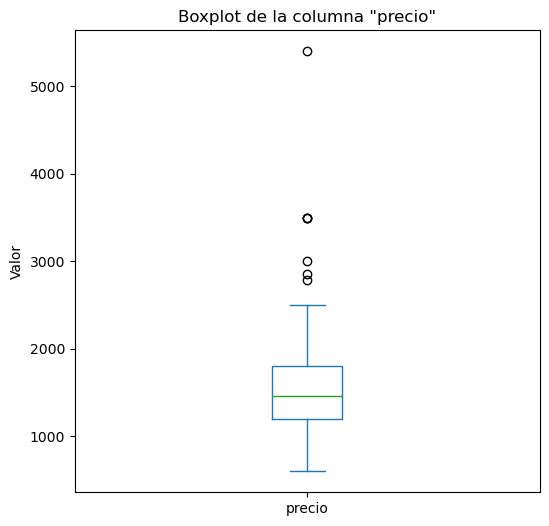

In [61]:
import matplotlib.pyplot as plt

columna = 'precio'

df1[columna].plot(kind='box', figsize=(6, 6))

plt.title(f'Boxplot de la columna "{columna}"')
plt.ylabel('Valor')

plt.show()

In [62]:
from faker import Faker

import random

faker = Faker()

ratings = [random.randint(1, 5) for _ in range(len(alquiler))]

ratings

[4,
 1,
 5,
 5,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 5,
 5,
 4,
 5,
 3,
 3,
 3,
 3,
 4,
 1,
 4,
 5,
 1,
 5,
 4,
 3,
 2,
 2,
 3,
 3,
 1,
 5,
 1,
 2,
 4,
 1,
 5,
 5,
 2,
 1,
 4,
 2,
 3,
 4,
 4,
 3,
 1,
 1,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 5,
 2,
 4,
 2,
 4,
 4,
 5,
 2,
 2,
 3,
 5,
 2,
 2,
 4,
 4,
 2,
 1,
 1,
 3,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 1,
 4,
 5,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 1,
 2,
 2,
 1,
 4,
 1,
 1,
 5,
 3,
 3,
 1,
 3,
 5,
 2,
 1,
 5,
 5,
 1,
 5,
 1,
 1,
 2,
 4,
 4,
 2,
 3,
 5,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 5,
 4,
 3,
 4,
 5,
 2,
 4,
 1,
 3,
 3,
 4,
 5,
 5,
 4,
 5,
 2,
 4,
 3,
 4,
 5,
 2,
 5,
 2,
 2,
 1,
 5,
 5,
 3,
 4,
 2,
 4,
 5,
 5,
 4,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 4,
 2,
 5,
 2,
 5,
 2,
 1,
 4,
 3,
 5,
 3,
 2,
 1,
 3,
 1,
 2,
 5,
 5,
 3,
 3,
 4,
 3,
 1,
 1,
 4,
 5,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 2,
 5,
 1,
 4,
 3,
 5,
 3,
 2,
 1,
 3,
 2,
 4,
 5,
 5,
 3,
 3,
 4,
 3,
 5,
 2,
 1,
 3,
 2,
 2,
 5,
 4,
 5,
 3,
 5,
 3,
 1,
 4,
 4,
 4,


In [63]:
#alquiler['rating'] = ratings

In [64]:
alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2
0,4,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674
1,0,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674
2,0,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674
3,4,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674
4,0,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674
...,...,...,...,...,...,...,...,...,...,...,...
8177,0,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223
8178,3,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223
8179,0,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223
8180,0,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223


In [65]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [ ]:
alquiler.to_csv('alquiler_limp.csv', index=False)

In [ ]:
mad_int.to_csv('mad_int_limp.csv', index=False)

In [ ]:
mad_ext.to_csv('mad_ext_limp.csv', index=False)